#  Dimensionality Reduction with PCA

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [2]:
# Import custom class
%run -i '../src/helper/transfxn.py'

In [3]:
# Instantiate the class
transfxn = TransformationPipeline()

# Load data

In [4]:
# Load the small subset of the data
df_small = pd.read_pickle('../data/collision.pkl')

# Create feature matrix & class label

In [5]:
# Feature matrix and class label
cols_to_drop = ['c_case','c_traf','p_id', 'v_id', 'class']
X, y = df_small.drop(cols_to_drop, axis = 1), df_small['class']

In [6]:
# Re-encode the class variable
y.replace({0:'Non-fatal', 1: 'Fatal'}, inplace=True)

# Transformation pipeline

In [7]:
# Transform and scale data
X_scaled, _,_ = transfxn.preprocessing(X, X)

In [8]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (11453, 126)


# PCA plot

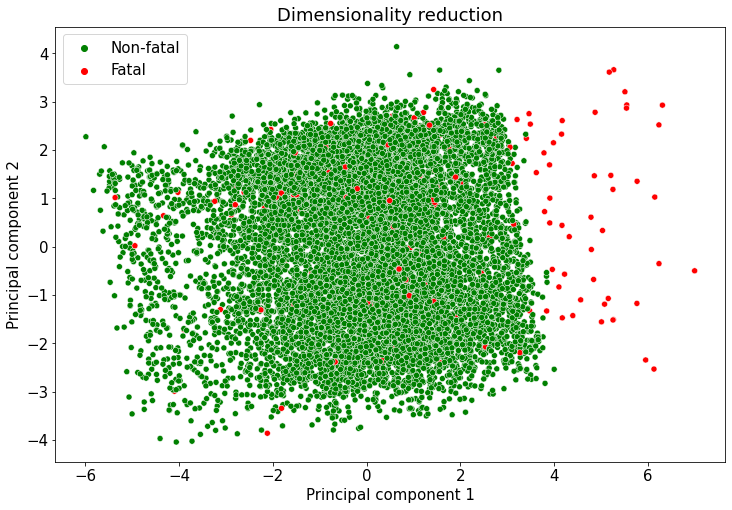

In [9]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])